In [1]:
!pip install pmdarima

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [20]:
pd.read_csv('AirPassengers.csv', sep=',')

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [25]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
dataset = pd.read_csv('AirPassengers.csv', parse_dates =['Month'], index_col = 'Month', date_parser = dateparse)

C:\Users\DELL\AppData\Local\Temp/ipykernel_7388/2948585459.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [26]:
dataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [28]:
time_series = dataset['#Passengers']

In [33]:
time_series

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [35]:
time_series.dtype

dtype('int64')

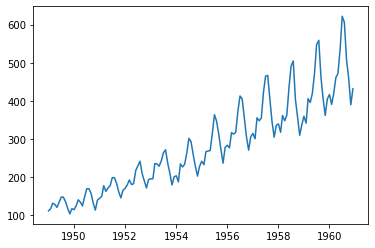

In [37]:
plt.plot(time_series)

In [38]:
decomp = seasonal_decompose(time_series)

In [39]:
tendencia = decomp.trend
sazonal = decomp.seasonal
aleatorio = decomp.resid

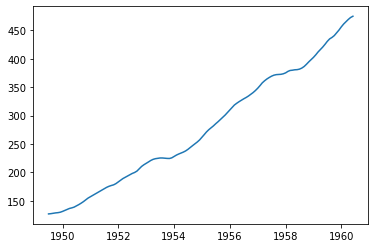

In [40]:
plt.plot(tendencia)

# ARIMA P Q D (Previsões)

In [41]:
model = auto_arima(time_series)

In [42]:
model.order

(4, 1, 3)

In [43]:
predictions = model.predict(n_periods=12) #12 Meses de previsão

In [44]:
predictions

array([467.57396676, 490.49489598, 509.13728088, 492.55503493,
       495.30607373, 475.9477968 , 476.33979836, 475.55211378,
       472.35388986, 483.8897866 , 475.57035276, 485.92169907])

# Treinando e Gerando Gráfico

In [46]:
len(time_series) # 144 Registros

144

In [47]:
## Separar 130 valores para treinar e 14 para teste

In [50]:
treino = time_series[:130]
treino.shape

(130,)

In [52]:
treino.index.min(), treino.index.max()  # Ver os valores maximos e mínimos 

(Timestamp('1949-01-01 00:00:00'), Timestamp('1959-10-01 00:00:00'))

In [54]:
teste = time_series[130:]

In [55]:
teste.shape

(14,)

In [56]:
teste.index.min(), teste.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [57]:
modelo = auto_arima(treino)

In [58]:
previsao = pd.DataFrame(modelo.predict(n_periods=14), index=teste.index)
previsao.columns = ['Previsão de passageiros']
previsao

,Previsão de passageiros
Month,
1959-11-01,357.690517
1959-12-01,334.857459
1960-01-01,342.488600
1960-02-01,375.944535
1960-03-01,424.126285
1960-04-01,473.151437
1960-05-01,510.388369
1960-06-01,527.724232
1960-07-01,523.268322


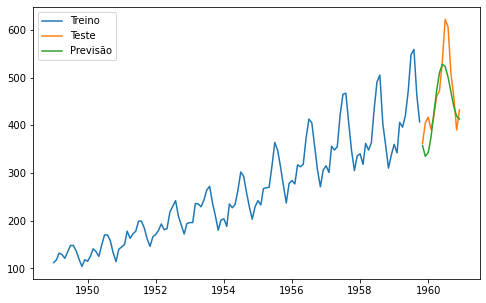

In [59]:
plt.figure(figsize=(8,5))
plt.plot(treino, label='Treino')
plt.plot(teste, label='Teste')
plt.plot(previsao, label = 'Previsão')
plt.legend();